In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy.stats import linregress
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
from matplotlib.lines import Line2D
from matplotlib.legend import Legend

In [2]:
AHe=pd.read_csv("/Users/smoron/Documents/1.Projects/Thermochron/Thermochron_figs&tables_0819/Table_3_1_selected.csv",sep=',', header=0)
samples=np.unique(AHe.Sample_No)
gm=np.unique(AHe.Grain_morphology)


In [3]:
r_square_eU=np.zeros(len(gm)); r_square_Rs=np.zeros(len(gm))

for i in np.arange(0,len(gm),1):
    r_square_eU[i]=round(scipy.stats.linregress(AHe.eU_ppm[AHe.Grain_morphology==gm[i]], AHe.Corrected_Age_Ma[AHe.Grain_morphology==gm[i]])[2]**2,3)

for i in np.arange(0,len(gm),1):
    r_square_Rs[i]=round(scipy.stats.linregress(AHe.Rs_um[AHe.Grain_morphology==gm[i]], AHe.Corrected_Age_Ma[AHe.Grain_morphology==gm[i]])[2]**2,2)


In [4]:
cmap = plt.get_cmap('nipy_spectral')
norm = mcolors.Normalize(vmin=0, vmax=(len(samples))-1)

timestep=np.arange(0,len(samples),1)
def get_colour(timestep):
    return cmap(norm(timestep))
c=cmap(norm(timestep))

In [5]:
ms=5
legend_elements0T=[ mlines.Line2D([], [], marker='o', color=c[0], label=np.unique(AHe.Sample_No[AHe.Grain_morphology==gm[0]])[0],markersize=ms, linestyle='None')
                , mlines.Line2D([], [], marker='o', color=c[1], label=np.unique(AHe.Sample_No[AHe.Grain_morphology==gm[0]])[1],markersize=ms, linestyle='None')
                , mlines.Line2D([], [], marker='o', color=c[2], label=np.unique(AHe.Sample_No[AHe.Grain_morphology==gm[0]])[2],markersize=ms, linestyle='None')
                , mlines.Line2D([], [], marker='o', color=c[3], label=np.unique(AHe.Sample_No[AHe.Grain_morphology==gm[0]])[3],markersize=ms, linestyle='None')
                , mlines.Line2D([], [], marker='o', color=c[4], label=np.unique(AHe.Sample_No[AHe.Grain_morphology==gm[0]])[4],markersize=ms, linestyle='None')
                , mlines.Line2D([], [], marker='o', color=c[5], label=np.unique(AHe.Sample_No[AHe.Grain_morphology==gm[0]])[5],markersize=ms, linestyle='None')
                , mlines.Line2D([], [], marker='o', color=c[6], label=np.unique(AHe.Sample_No[AHe.Grain_morphology==gm[0]])[6],markersize=ms, linestyle='None')
                , mlines.Line2D([], [], marker='o', color=c[7], label=np.unique(AHe.Sample_No[AHe.Grain_morphology==gm[0]])[7],markersize=ms, linestyle='None')
                , mlines.Line2D([], [], marker='o', color=c[8], label=np.unique(AHe.Sample_No[AHe.Grain_morphology==gm[0]])[8],markersize=ms, linestyle='None')]

legend_elements1T=[ mlines.Line2D([], [], marker='s', color=c[0], label=np.unique(AHe.Sample_No[AHe.Grain_morphology==gm[1]])[0],markersize=ms, linestyle='None')
                 , mlines.Line2D([], [], marker='s', color=c[2], label=np.unique(AHe.Sample_No[AHe.Grain_morphology==gm[1]])[1],markersize=ms, linestyle='None')
                , mlines.Line2D([], [], marker='s', color=c[4], label=np.unique(AHe.Sample_No[AHe.Grain_morphology==gm[1]])[2],markersize=ms, linestyle='None')
                , mlines.Line2D([], [], marker='s', color=c[7], label=np.unique(AHe.Sample_No[AHe.Grain_morphology==gm[1]])[3],markersize=ms, linestyle='None')]

legend_elements2T=[ mlines.Line2D([], [], marker='d', color=c[2], label=np.unique(AHe.Sample_No[AHe.Grain_morphology==gm[2]])[0],markersize=ms, linestyle='None')
                 , mlines.Line2D([], [], marker='d', color=c[5], label=np.unique(AHe.Sample_No[AHe.Grain_morphology==gm[2]])[1],markersize=ms, linestyle='None')]

legend_elements=[legend_elements0T, legend_elements1T, legend_elements2T]

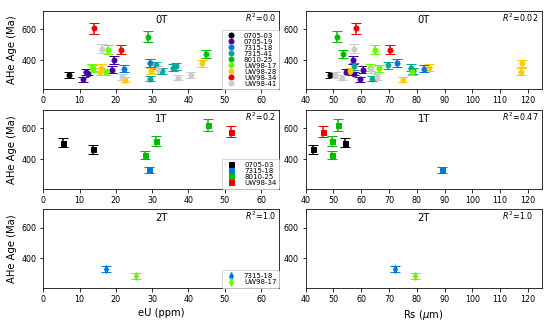

In [20]:
fig, axs = plt.subplots(3,2, figsize=(7.5, 11/2.5))
lfs=7
lbp=0
lls=0.00001
ls=8
marker=['o', 's', 'd']
gmt=['0T', '1T', '2T']
##########
#eU plots#
##########

for j in np.arange(0,len(gm),1):
    ax = axs[j,0]
    for i in np.arange(0,len(samples),1):
        ax.errorbar(AHe.eU_ppm[(AHe.Sample_No==samples[i])&(AHe.Grain_morphology==gm[j])],
                    AHe.Corrected_Age_Ma[(AHe.Sample_No==samples[i])&(AHe.Grain_morphology==gm[j])],
                    yerr=AHe.Corrected_Age_Ma_1s[(AHe.Sample_No==samples[i])&(AHe.Grain_morphology==gm[j])],
                    fmt=marker[j], capsize=5,ms=ms,c=c[i])
        ax.set_title(gmt[j], pad=-12, fontsize=10)
    ax.text(55,650, str(' $R^2$=')+str(r_square_eU[j]),fontsize=ls)
    ax.set(ylabel='AHe Age (Ma)')
    ax.tick_params(axis='both', which='major', labelsize=ls)
    ax.set_xlim(0,65)
    ax.set_ylim(210,720)
    ax.legend(handles=legend_elements[j], borderaxespad=lbp, fontsize=lfs, labelspacing=lls, loc='lower right')

ax.set(xlabel='eU (ppm)', ylabel='AHe Age (Ma)')


##########
#Rs plots#
##########
for j in np.arange(0,len(gm),1):
    ax = axs[j,1]
    for i in np.arange(0,len(samples),1):
        ax.errorbar(AHe.Rs_um[(AHe.Sample_No==samples[i])&(AHe.Grain_morphology==gm[j])],
                    AHe.Corrected_Age_Ma[(AHe.Sample_No==samples[i])&(AHe.Grain_morphology==gm[j])],
                    yerr=AHe.Corrected_Age_Ma_1s[(AHe.Sample_No==samples[i])&(AHe.Grain_morphology==gm[j])],
                    fmt=marker[j], capsize=5,ms=ms,c=c[i])
        ax.set_title(gmt[j], pad=-12, fontsize=10)
    ax.text(110,650, str(' $R^2$=')+str(r_square_Rs[j]), fontsize=ls)
    ax.tick_params(axis='both', which='major', labelsize=ls)
    ax.set_xlim(40,125)
    ax.set_ylim(210,720)

ax.set(xlabel='Rs ($\mu$m)')

plt.tight_layout(pad=0.10)
fig.savefig("AHe_age_vs_eU_vsRs_grouped_byGM_nobars_nipy_spectral.pdf", dpi=300)
